In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
#positive examples
positive = pd.read_csv('/content/drive/MyDrive/features_virus_miRNAs.csv')

# The negative set is composed of a random set of hsa hairpin-like sequences 
negative = pd.read_csv('/content/drive/MyDrive/features_unlabeled_hairpins.csv') 

In [3]:
positive.drop('sequence_names', inplace=True, axis=1)
negative.drop('sequence_names', inplace=True, axis=1)
positive['class'] = 1
negative['class'] = 0
data = [positive, negative]
df = pd.concat(data)

In [4]:
df

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
0,0.292308,0.169231,0.200000,0.338462,0.109375,0.015625,0.078125,0.093750,0.062500,0.031250,...,-27.28,0.457857,1.67,0.007385,0.066635,-0.412308,-1.116667,-0.137436,-1.072000,1
1,0.276923,0.215385,0.230769,0.276923,0.125000,0.078125,0.046875,0.031250,0.078125,0.000000,...,-23.95,0.154283,5.77,0.017692,0.228730,-0.350769,-0.786207,-0.116923,-1.036364,1
2,0.242424,0.287879,0.227273,0.242424,0.061538,0.061538,0.061538,0.046154,0.061538,0.138462,...,-27.02,0.426696,2.62,0.007879,0.107199,-0.401515,-0.779412,-0.100379,-1.204545,1
3,0.200000,0.257143,0.300000,0.242857,0.028986,0.057971,0.057971,0.057971,0.057971,0.072464,...,-32.11,0.101080,6.03,0.020143,0.214866,-0.438571,-0.787179,-0.146190,-1.228000,1
4,0.258065,0.193548,0.225806,0.322581,0.098361,0.016393,0.049180,0.081967,0.049180,0.049180,...,-26.28,0.639769,0.94,0.004516,0.040681,-0.419355,-1.000000,-0.139785,-1.238095,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999883,0.237000,0.100000,0.287000,0.375000,0.025000,0.025000,0.063000,0.114000,0.038000,0.000000,...,-18.20,0.064000,24.75,0.021000,0.904000,-0.206000,-0.532000,-0.069000,-0.589000,0
999884,0.305000,0.162000,0.152000,0.381000,0.115000,0.010000,0.038000,0.135000,0.058000,0.048000,...,-23.73,0.071000,11.46,0.016000,0.342000,-0.210000,-0.670000,-0.053000,-0.650000,0
999885,0.394000,0.182000,0.136000,0.288000,0.108000,0.092000,0.092000,0.108000,0.108000,0.015000,...,-9.83,0.116000,5.91,0.020000,0.214000,-0.129000,-0.405000,-0.043000,-0.447000,0
999886,0.263000,0.188000,0.175000,0.375000,0.063000,0.063000,0.051000,0.089000,0.063000,0.025000,...,-16.49,0.065000,13.95,0.021000,0.461000,-0.185000,-0.510000,-0.046000,-0.510000,0


In [7]:
df.fillna(value=0, inplace = True)
df = df.sample(frac=1)

# amount of positive classes 569 rows.
positive_df = df.loc[df['class'] == 1]
negative_df = df.loc[df['class'] == 0][:569]

normal_distributed_df = pd.concat([positive_df, negative_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)


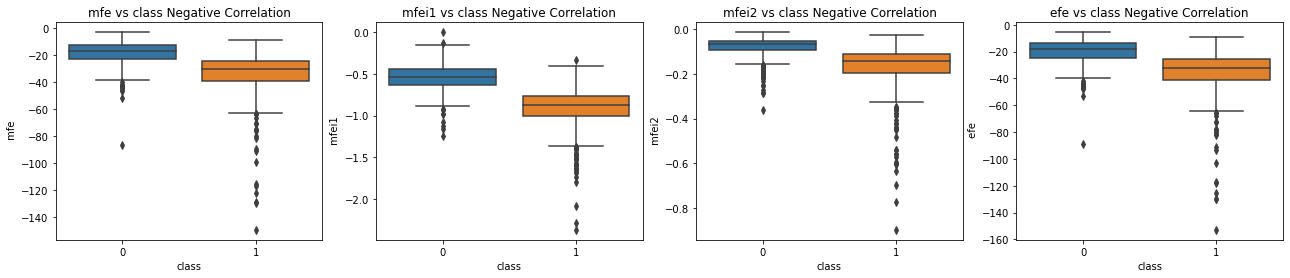

In [8]:
f, axes = plt.subplots(ncols=4, figsize=(22,4))

# Negative Correlations with our Class
sns.boxplot(x="class", y=" mfe", data=new_df, ax=axes[0])
axes[0].set_title('mfe vs class Negative Correlation')

sns.boxplot(x="class", y=" mfei1", data=new_df, ax=axes[1])
axes[1].set_title('mfei1 vs class Negative Correlation')


sns.boxplot(x="class", y=" mfei2", data=new_df, ax=axes[2])
axes[2].set_title('mfei2 vs class Negative Correlation')


sns.boxplot(x="class", y=" efe", data=new_df, ax=axes[3])
axes[3].set_title('efe vs class Negative Correlation')

plt.show()

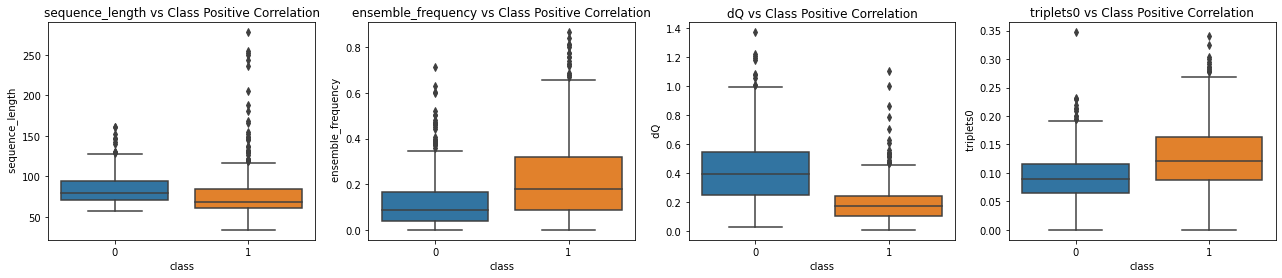

In [9]:
f, axes = plt.subplots(ncols=4, figsize=(22,4))

# Positive correlations with our Class
sns.boxplot(x="class", y=" sequence_length", data=new_df, ax=axes[0])
axes[0].set_title('sequence_length vs Class Positive Correlation')

sns.boxplot(x="class", y=" ensemble_frequency", data=new_df, ax=axes[1])
axes[1].set_title('ensemble_frequency vs Class Positive Correlation')


sns.boxplot(x="class", y=" dQ", data=new_df, ax=axes[2])
axes[2].set_title('dQ vs Class Positive Correlation')


sns.boxplot(x="class", y=" triplets0", data=new_df, ax=axes[3])
axes[3].set_title('triplets0 vs Class Positive Correlation')

plt.show()

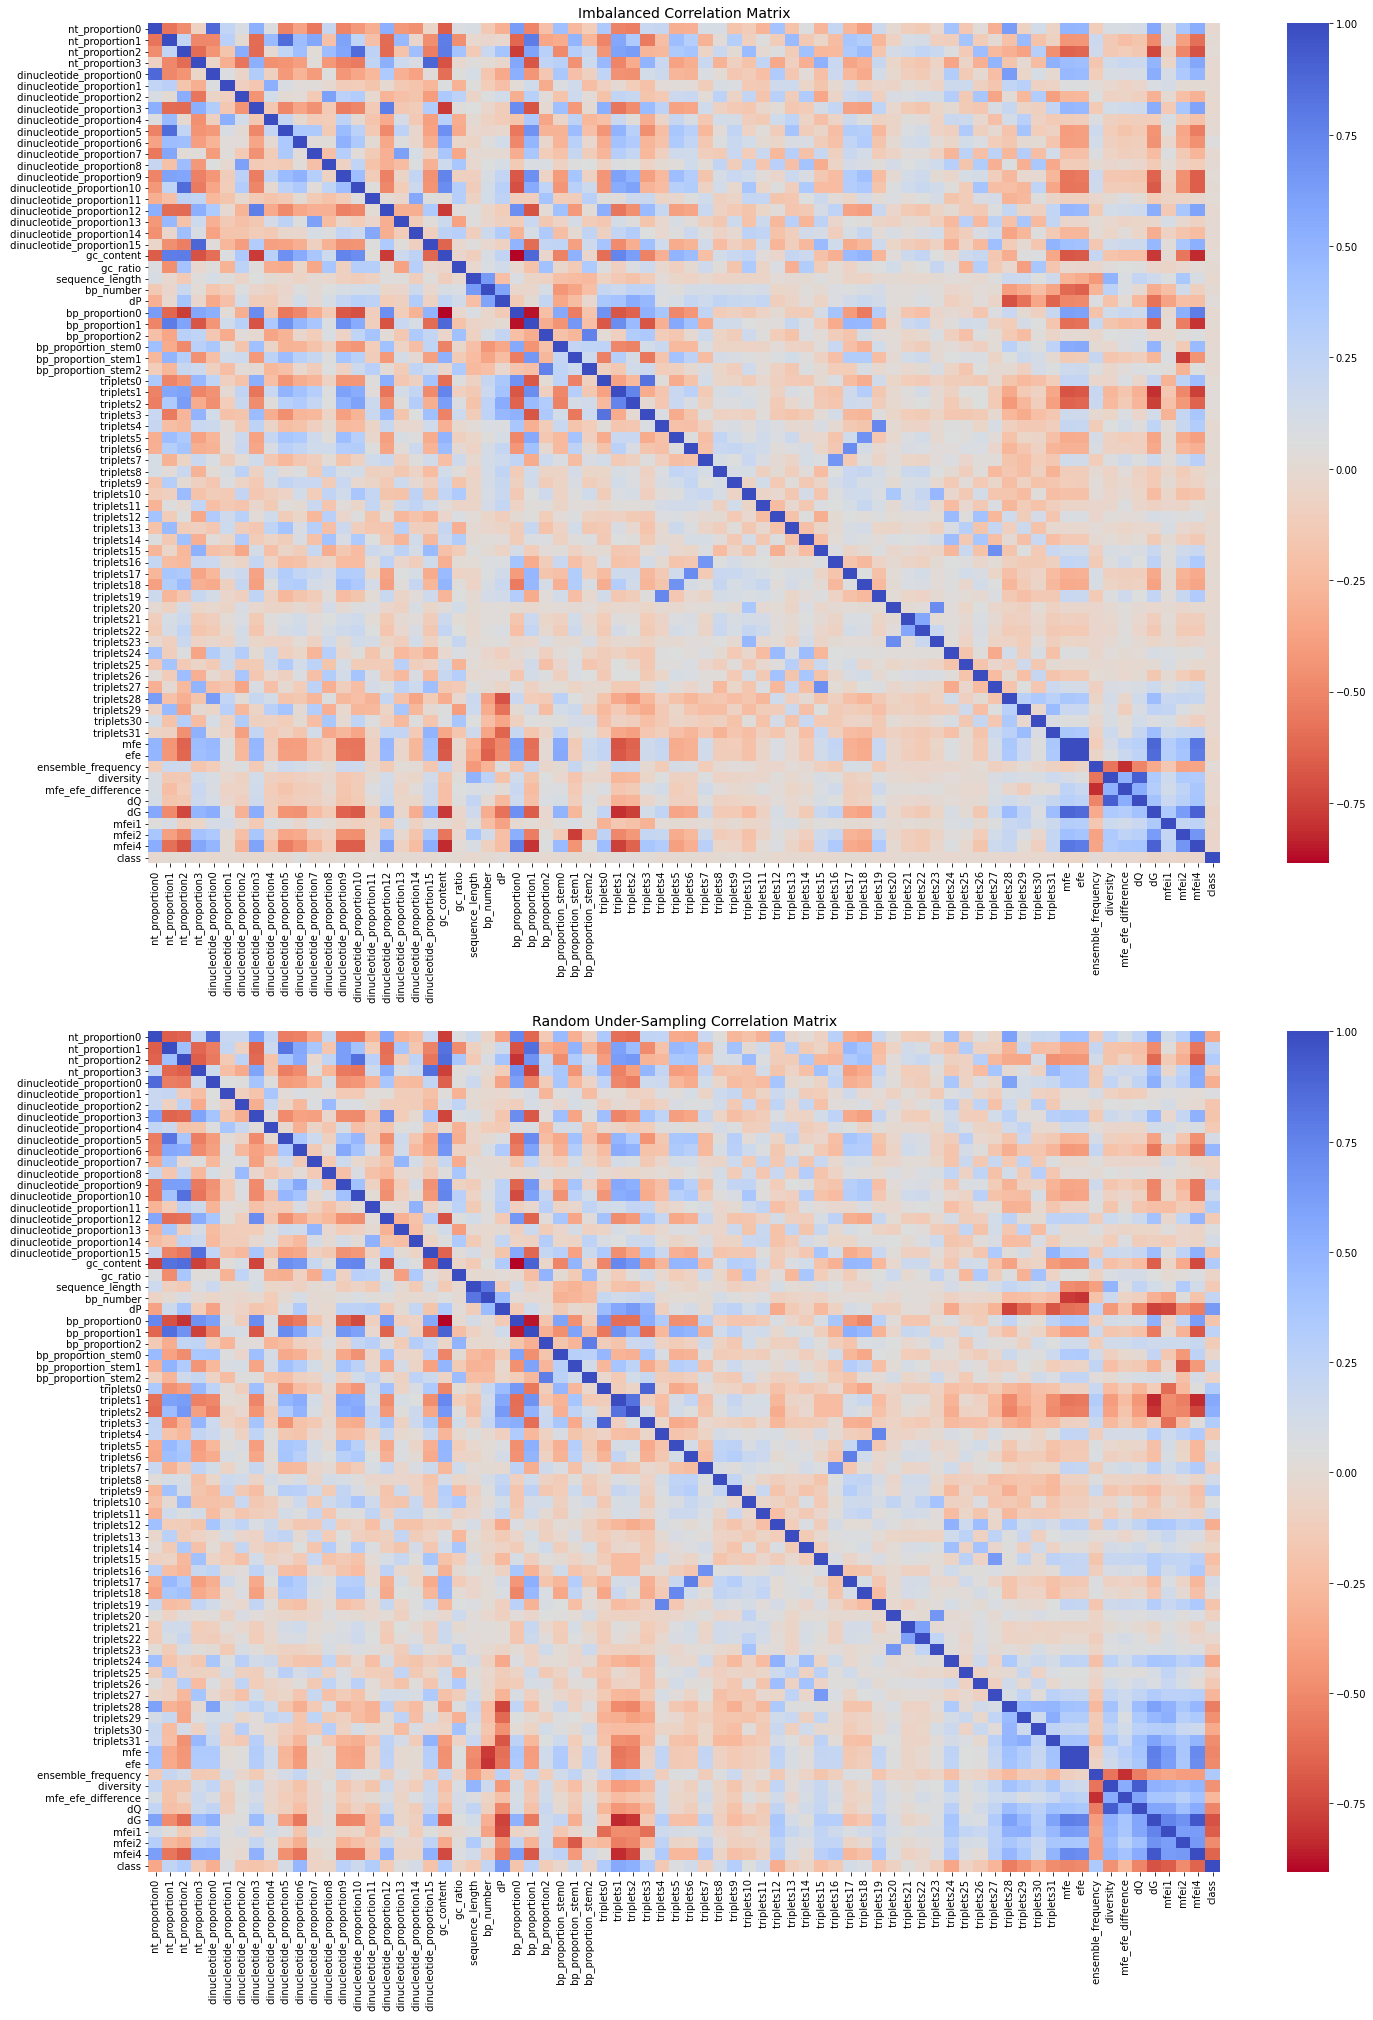

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,34))


corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':34}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':34}, ax=ax2)
ax2.set_title('Random Under-Sampling Correlation Matrix', fontsize=14)
plt.show()